In [11]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

from fishsense_lite_python_pipeline import RawProcessor, FishSegmentationInference

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
input_file = "./data/P7170081.ORF"

In [12]:
def imshow(img: np.ndarray):
    """
    Helper function for showing images in this notebook.
    """
    img = (uint16_2_double(img) * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)

def uint16_2_double(img: np.ndarray) -> np.ndarray:
    return img.astype(np.float64) / 65535

In order to have greater control over the image processing steps, begin with the RAW output.  This allows us to keep more information than would be possible otherwise.

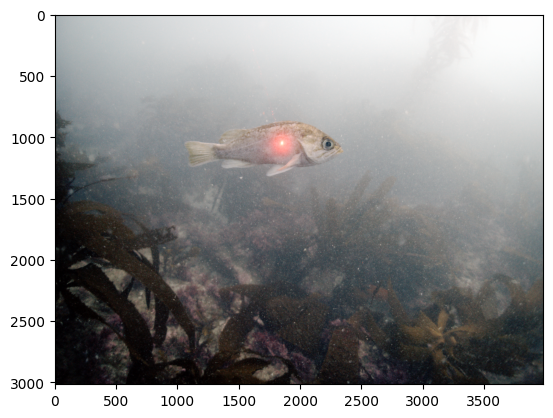

In [13]:
raw_processor = RawProcessor()
img = raw_processor.load_and_process(Path(input_file))

imshow(img)

We use Fishial to find the mask for the fish.

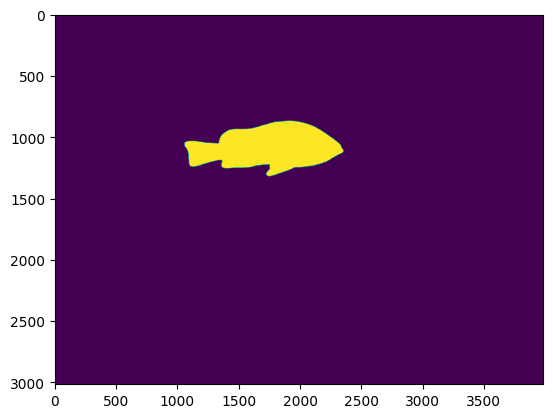

In [14]:
img8 = (uint16_2_double(img) * 255).astype(np.uint8)

fish_segmentation_inference = FishSegmentationInference(device)
outputs = fish_segmentation_inference.inference(img8)

complete_mask = np.zeros_like(img[:, :, 0], dtype=bool)
for mask in outputs['instances'].pred_masks:
    complete_mask = np.logical_or(mask.cpu(), complete_mask)

plt.imshow(complete_mask)